In [23]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imutils
from PIL import Image
from wand.image import Image
import pytesseract 
import os

In [2]:
img="C:\\Users\\spart\\Downloads\\DATA (3)\\data\\MRI-Report\\dp15.jpg"

# Display the image

In [3]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    height, width = im_data.shape[:2]  

    figsize = width / float(dpi), height / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    
    if len(im_data.shape) == 2:  
        ax.imshow(im_data, cmap='gray')
    elif len(im_data.shape) == 3:  
        ax.imshow(im_data)
    else:
        raise ValueError("Unsupported image format")

    plt.show()

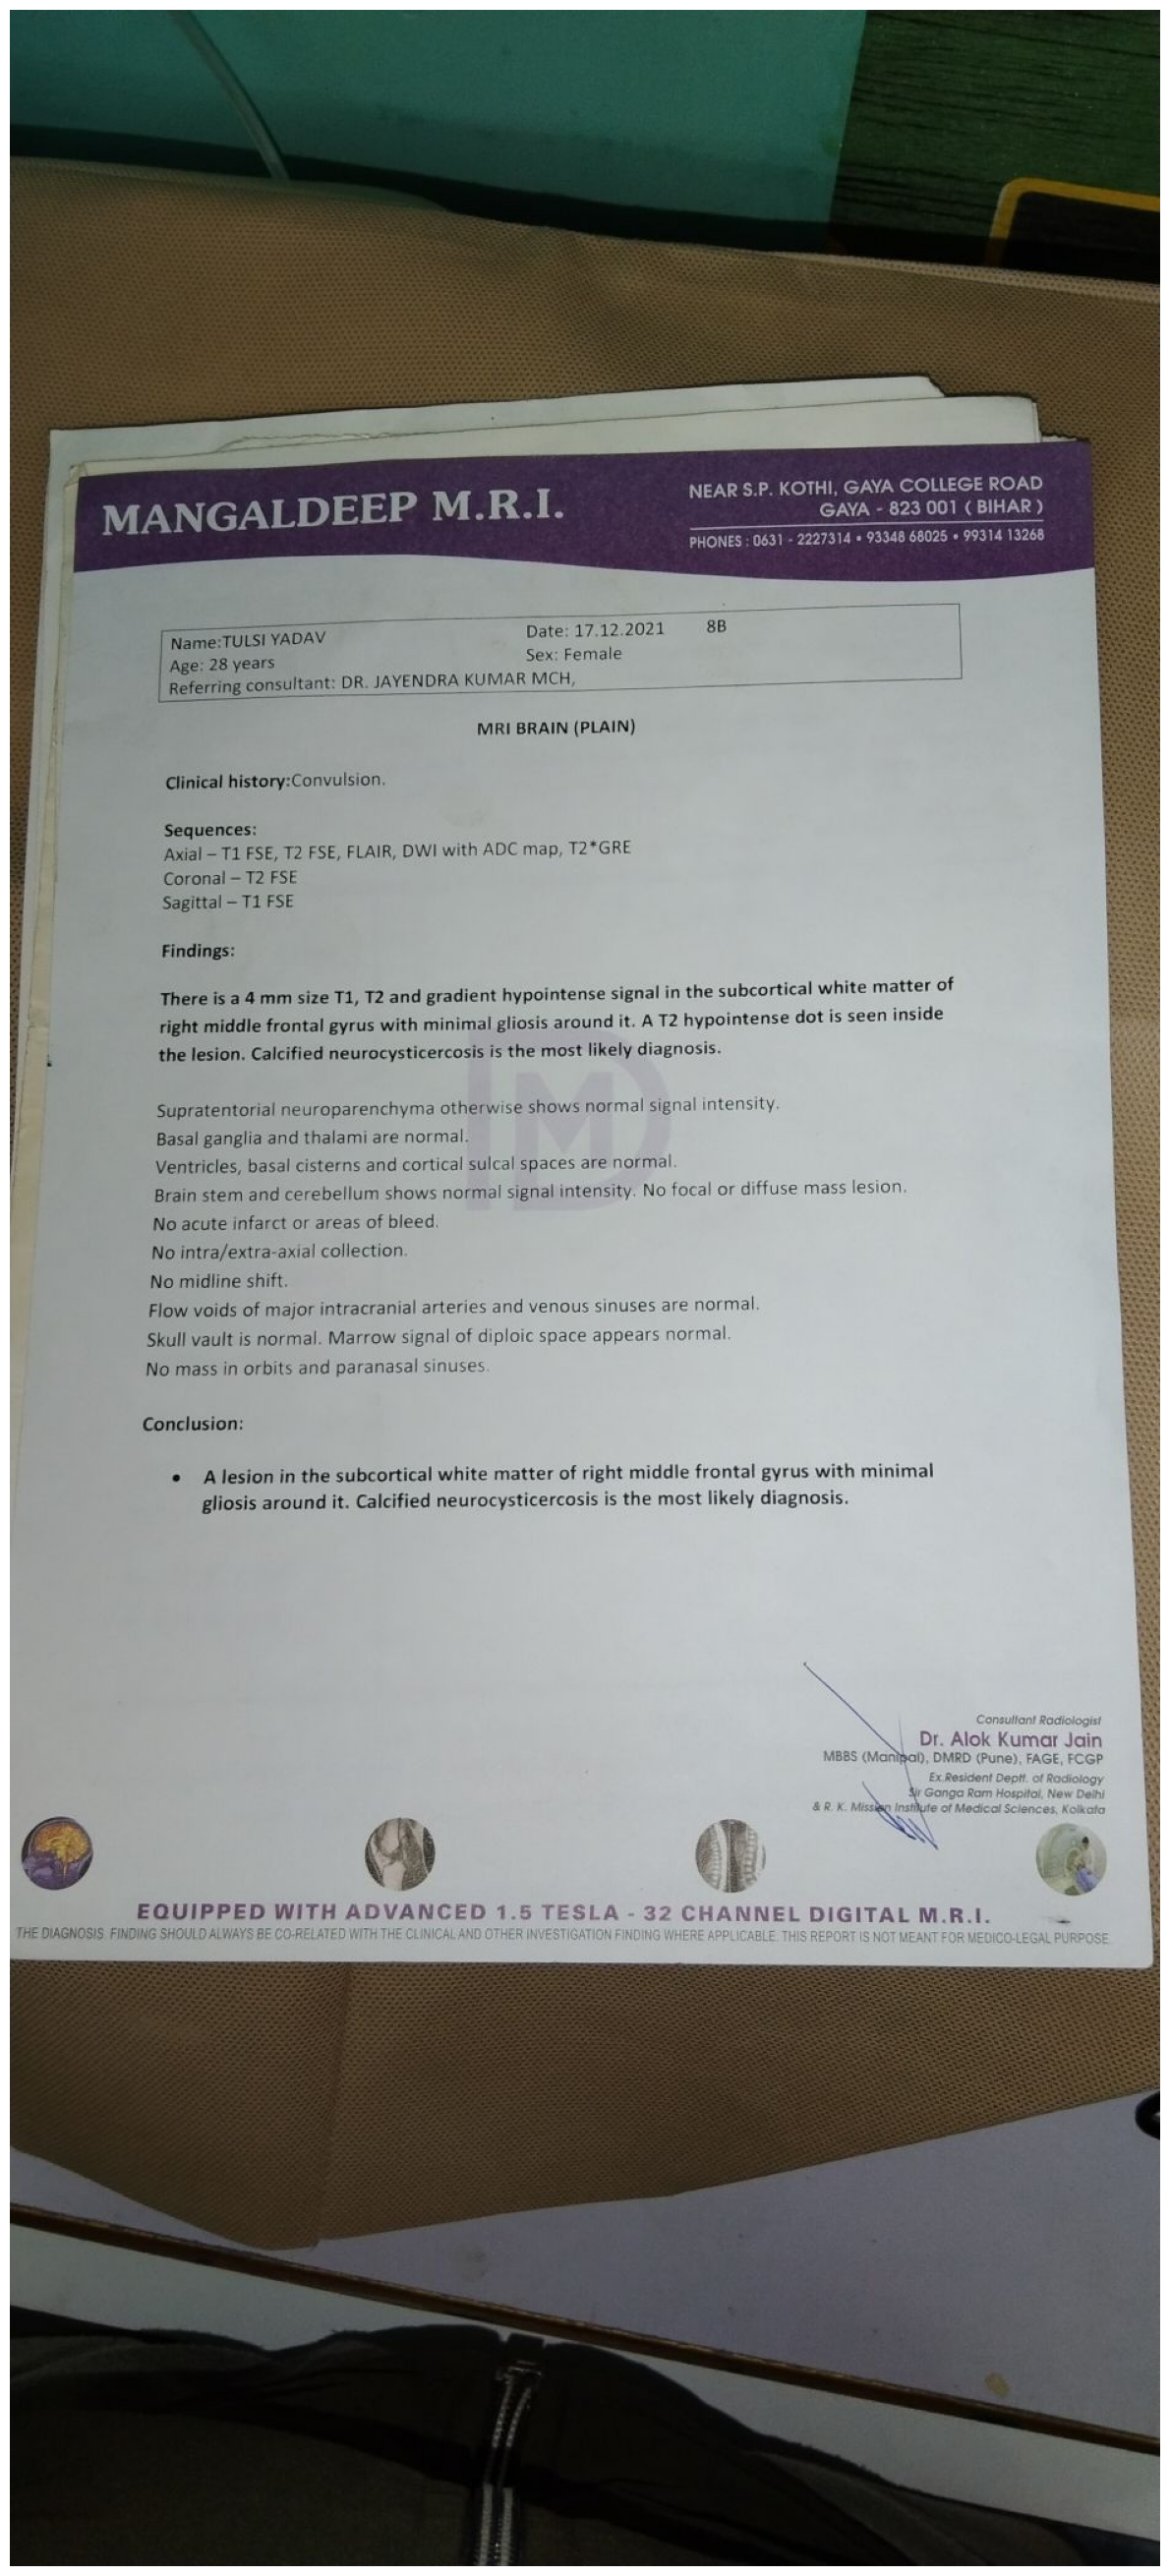

In [4]:
display("C:\\Users\\spart\\Downloads\\DATA (3)\\data\\MRI-Report\\dp17.jpg")

# Save all the reports in another folder

In [5]:
import os
import cv2

def extract_images_from_folders(root_dir, output_dir):
    # Iterate through all folders and subfolders in the root directory
      for folder_name, subfolders, filenames in os.walk(root_dir):
        # Check if the folder name contains the word "report"
        if "report" in folder_name.lower():
            for filename in filenames:
                # Check if the file is an image (you can adjust the list of valid extensions)
                if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                    # Construct the full path of the image file
                    image_path = os.path.join(folder_name, filename)
                    # Read the image using OpenCV
                    image = cv2.imread(image_path)
                    # Construct the output directory path
                    output_subdirectory = os.path.join(output_dir, os.path.relpath(folder_name, root_dir))
                    # Create the output directory if it doesn't exist
                    os.makedirs(output_subdirectory, exist_ok=True)
                    # Construct the output file path
                    output_path = os.path.join(output_subdirectory, filename)
                    # Save the image to the output directory
                    cv2.imwrite(output_path, image)
# Example usage:
root_directory = "C:\\Users\\spart\\Downloads\\DATA (3)\\data"  # Replace with the path to your root directory containing subfolders with images
output_directory = "C:\\Users\\spart\\Desktop\\IOT Project"  # Replace with the path to your output directory
extract_images_from_folders(root_directory, output_directory)


# Image Processing 

1. Binarization 

In [6]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [7]:
def threshold(img):
    return cv2.adaptiveThreshold(cv2.medianBlur(img, 1), 300, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 25, 7) #Changes can be made to medianBlur(img,1), & 25 as per requirement

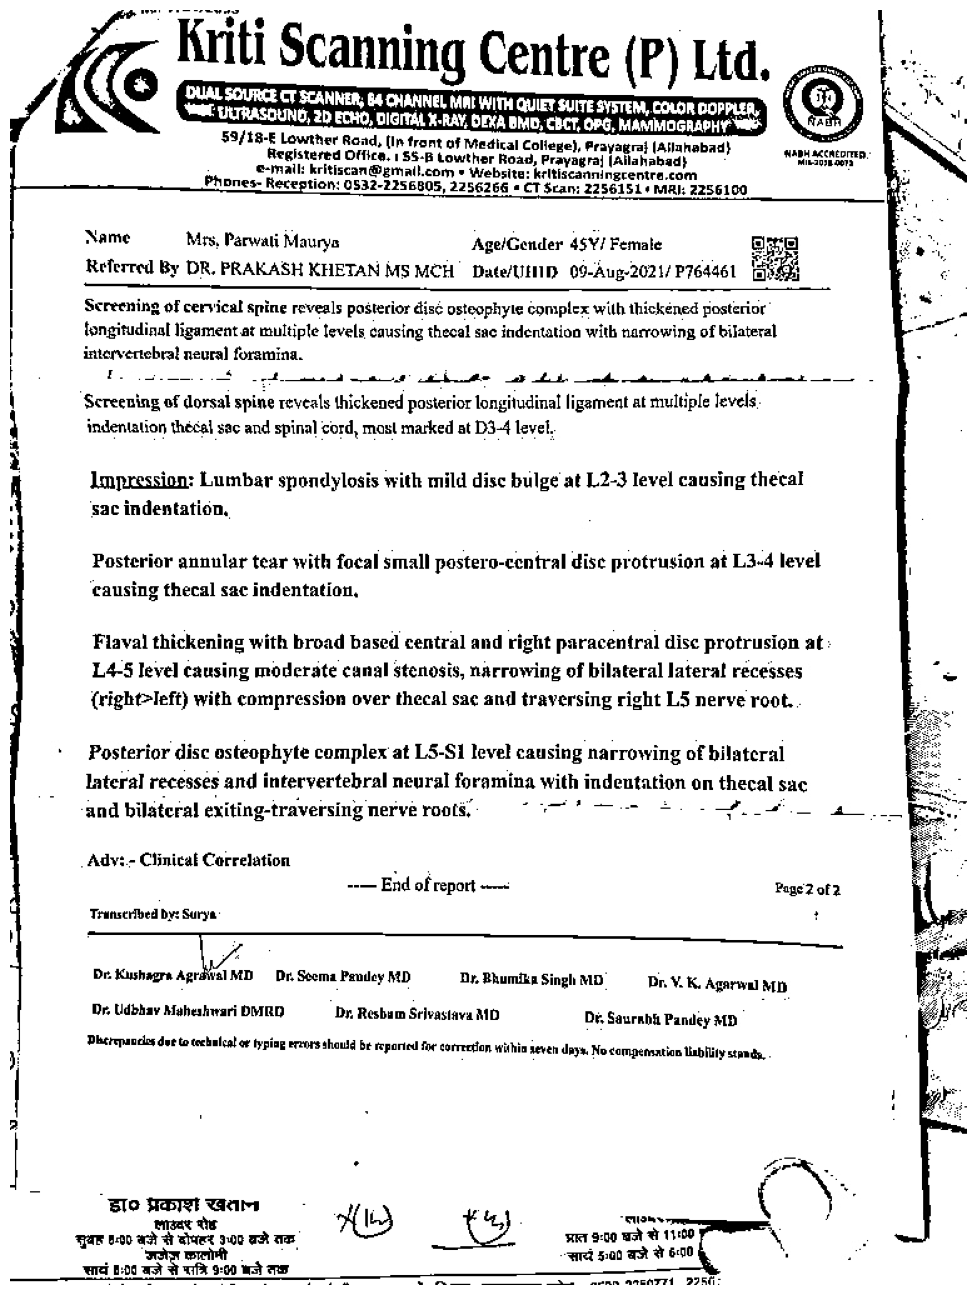

In [8]:
cv2.imwrite("temp.jpg",threshold(grayscale(cv2.imread(img))))
display('temp.jpg')

2. Noise removal

In [9]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 1)
    return (image)
# Currently not required please add if required 

3. Thin/Thick font

In [10]:
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)# Can change the kernel size (2,2) as per requirement
    image = cv2.erode(image, kernel, iterations=1)# Can change the no. of iterations
    image = cv2.bitwise_not(image)
    return (image)
# Currently not required 

In [11]:
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8) # Can change the kernel size (2,2) as per requirement 
    image = cv2.dilate(image, kernel, iterations=1) # Can change the no. of iterations
    image = cv2.bitwise_not(image)
    return (image)
# Currently not required

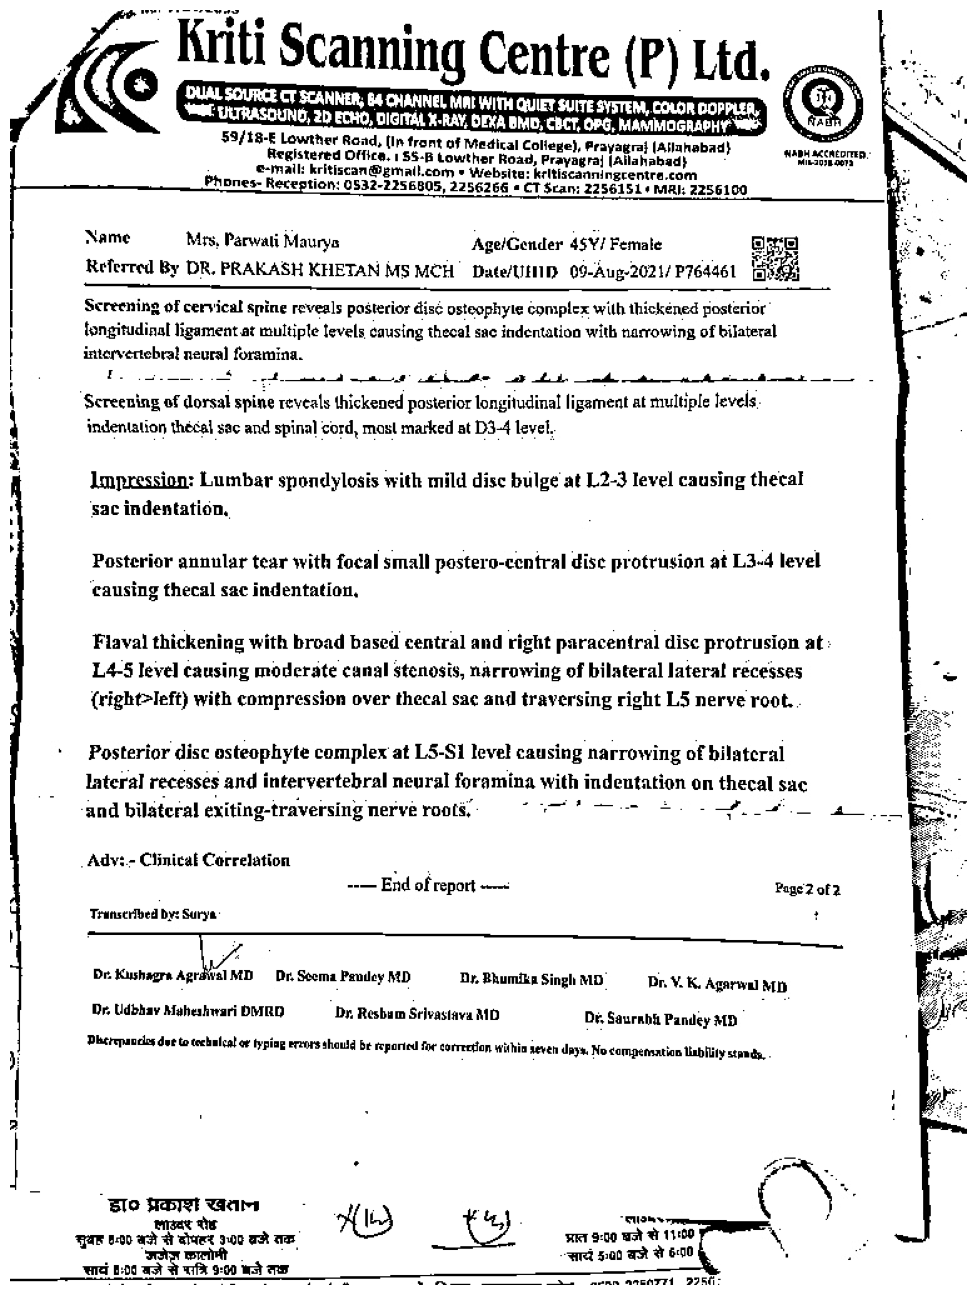

In [12]:
cv2.imwrite("temp.jpg",threshold(grayscale(cv2.imread(img))))
display('temp.jpg')

4. Deskew

In [13]:
def deskew_and_display_image(input_path,temp_path):
    # Open the input image
    with Image(filename=input_path) as img:
        # Deskew the image
        img.deskew(0.4 * img.quantum_range)
        # Save the deskewed image
        img.save(filename=temp_path)

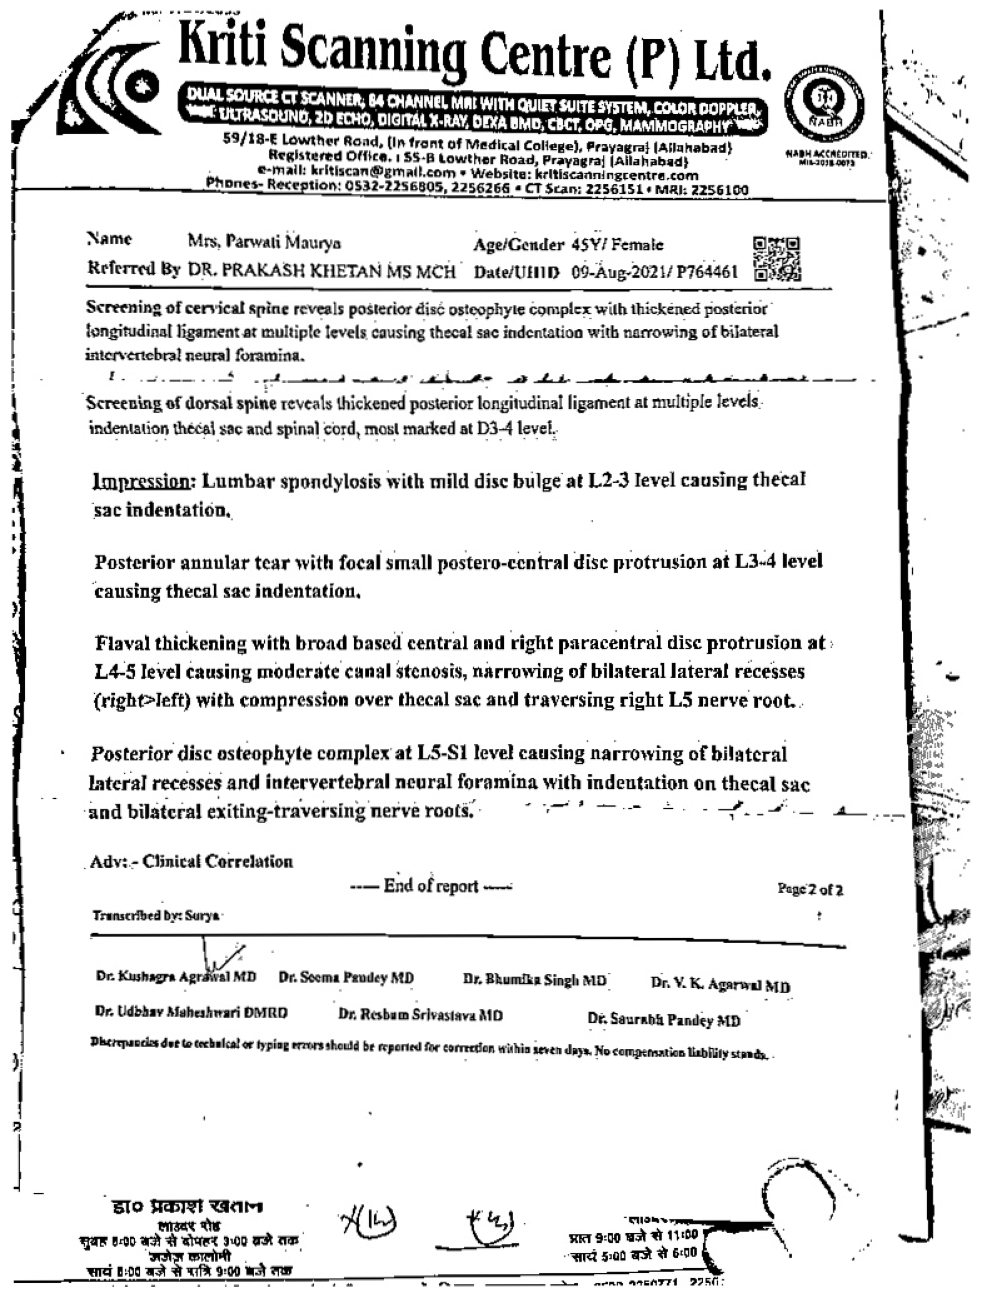

In [14]:
cv2.imwrite("temp.jpg",threshold(grayscale(cv2.imread(img))))
deskew_and_display_image('temp.jpg','temp.jpg')
display('temp.jpg')

5. Remove Borders 

In [15]:
def remove_borders(image):
    contours, heiarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntsSorted = sorted(contours, key=lambda x:cv2.contourArea(x))
    cnt = cntsSorted[-1]
    x, y, w, h = cv2.boundingRect(cnt)
    crop = image[y:y+h, x:x+w]
    return (crop)

In [18]:
deskew_and_display_image(img,temp)
cv2.imwrite(temp,remove_borders(threshold(grayscale(cv2.imread(temp)))))

NameError: name 'temp' is not defined

# Going through the Images ( The Main Function)

In [17]:
def process_images_in_folder(folder_path, output_dir, root_dir):
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(folder_path, filename)
            temp_path = os.path.join(output_dir, 'temp.jpg')

            # Deskew the image and save as temp
            deskew_and_display_image(image_path, temp_path)

            # Read the deskewed image
            deskewed_image = cv2.imread(temp_path)

            # Process the image: grayscale, threshold, remove borders
            gray_image = grayscale(deskewed_image)
            thresholded_image = threshold(gray_image)
            final_image = remove_borders(thresholded_image)

            # Construct output subdirectory path
            relative_path = os.path.relpath(folder_path, root_dir)
            output_subdirectory = os.path.join(output_dir, relative_path)

            # Create the output directory if it doesn't exist
            os.makedirs(output_subdirectory, exist_ok=True)

            # Construct the output file path
            output_path = os.path.join(output_subdirectory, filename)

            # Save the processed image to the output directory
            cv2.imwrite(output_path, final_image)

# Example usage:
input_folder = 'C:\\Users\\spart\\Desktop\\IOT Project'  # Replace with the path to your input folder containing images
output_folder = "C:\\Users\\spart\\Desktop\\Output"      # Replace with the path to your output folder

# Iterate through each folder in the input directory and process images
for root_dir, _, _ in os.walk(input_folder):
    process_images_in_folder(root_dir, output_folder, input_folder)


In [20]:
from PIL import Image
image_path ="C:\\Users\\spart\\Desktop\\IOT Project\\MRI-Report\\dp5.jpg"
image = Image.open(image_path)
text = pytesseract.image_to_string(image)

# Print the extracted text
print(text)


NJANANE UN Wile

HJAHANPUR WHOLE BODY MRI SCAN CENTRE |




In [21]:

from PIL import Image
image_path ="C:\\Users\\spart\\Desktop\\Output\\MRI-Report\\dp5.jpg"
image = Image.open(image_path)
text = pytesseract.image_to_string(image)

# Print the extracted text
print(text)


ey

» KHIRNI BAGH, NEAR eo SHAHJAHANPUR « “202 001 UP) :

PATNAME-RAJESHWARI"" "_- AGEISEX-55Y/F.
ERED BY-DR.VK RATHOUR 2 DATE-04.06.22

A , MRI LUMBOSACRAL SPINE
> STUDY PROTOCOLS: oa rs

a ‘

MULTI_SPIN ECHO TW AND FAST SPIN ECHO T2W SAGITTAL IMAGES OF LOMBOSACRAL SPINE WERE
OBTAINED AND CORRELATED WITH T1 AND T2W AXIAL, STIR CORONAL IMAGES.”
FINDINGS: © -

Disc -desiccative changes are seen at multiple levels in form of loss of T2W hyperintense ‘signal
intensity of peripheral part of nucleus pulposus. °° 7 ot
Tiny early marginal osteophytes are seen at multiple levels.

Diffuse posterior dise bulges are seen at L3-4, L4-5 and L6-S1 levels leading to mild indentation over
thecal sac and mild compression over bilateral traversing herve roots. Mild ligamentum flavum
. hypertrophy are seen at these levels,

<There Is straightening of lumbar curvature ki ely due to muscle spasm. |

| . a

Visualized vertebral bodies are otherwise normal in height and marrow signal intensity.
No evidence 